# Laboratorio 2-Graficación y análisis con Playstore

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# inicializador de objetos gráficos
plt.style.use('ggplot')

# para elaborar gráficas
import seaborn as sns
color= sns.color_palette()

In [2]:
# Deactivar wWarnings( para el caso e librerias desactualizadas)
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Filtar los datos
df= pd.read_csv('../../datos/playstore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# eliminado datos duplicados
df.drop_duplicates(subset='App', inplace=True)

# Limpieza de Datos con  expresiones regulares lambda 

In [7]:
# **************=    Rating   = ************************

In [8]:
# Usar una función lambda para reemplazar NaN con la media de la columna 'Rating'
df['Rating'] = df['Rating'].apply(lambda x: x if pd.notna(x) else df['Rating'].mean())

In [9]:
# **************=      Reviews    = ************************

In [10]:
# Función para reemplazar 'M' con 'millón' y convertir a entero
def replace_and_convert(value):
    value = str(value)  # Convertir el valor a cadena de texto
    if 'M' in value:
        # Extraer el número antes de 'M' y convertirlo a millones
        number = re.sub(r'[^\d.]', '', value)  # Elimina cualquier cosa que no sea dígito o punto
        return int(float(number) * 1_000_000)  # Convertir a entero después de multiplicar por 1,000,000
    else:
        # Convertir el valor directamente a entero
        return int(float(value))

# Aplicar la función para reemplazar y convertir los valores en la columna 'Reviews'
df['Reviews'] = df['Reviews'].apply(lambda x: replace_and_convert(x))

df.info()

NameError: name 're' is not defined

In [11]:
# **************=      Size    = ************************

In [12]:
# Reemplazar 'Varies with device' con np.nan
df['Size'] = df['Size'].apply(lambda x: np.nan if 'Varies with device' in str(x) else str(x))

In [13]:
# Limpiar la columna 'Size' usando una función lambda 
df['Size'] = df['Size'].apply(lambda x: x.replace('M', '').replace(',', '').replace('+', '') if isinstance(x, str) else x)

In [14]:
# Reemplazar NaN con la moda
size_mode = df['Size'].mode()[0]  # Encuentra la moda

# Reemplazar NaN con la moda utilizando lambda
df['Size'] = df['Size'].apply(lambda x: x if not pd.isna(x) else size_mode)

In [19]:
 # todo queda en MEGAS
df['Size']= df['Size'].apply(lambda x: float(str(x).replace('k',''))/1024 if 'k' in str(x) else x )

In [20]:
# Cambiar toda la columna a numerica
df['Size'] = df['Size'].apply(lambda x: float(x))

In [21]:
# **************=      Installs    = ************************

In [22]:
# Limpiar la columna Installs   usando una función lambda eliminado , y +
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '').replace(',', '') if isinstance(x, str) else x)

In [23]:
# Reemplazar 'Free' con NaN usando lambda
#df['Installs'] = df['Installs'].apply(lambda x: np.nan if x.lower() == 'free' else x)

# Reemplazar 'Free' con 0 usando lambda
df['Installs'] = df['Installs'].apply(lambda x: 0 if str(x).lower() == 'free' else x)

In [24]:
# Cambiar la columna a numerica
df['Installs'] = df['Installs'].apply(lambda x: float(x))

In [25]:
# **************=      Type    = ************************

In [26]:
# Reemplazar valores que no sean 'Free' o 'Paid' con NaN
df['Type'] = df['Type'].apply(lambda x: x if str(x).strip().lower() in ['free', 'paid'] else np.nan)

# Encontrar la moda de la columna 'Installs'
moda = df['Type'].mode()[0]

# Llenar los valores NaN con la moda usando lambda
df['Type'] = df['Type'].apply(lambda x: moda if pd.isna(x) else x)

In [27]:
# **************=      Price    = ************************

In [28]:
# columna price
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '').replace('Everyone', '0') if isinstance(x, str) else x)
df['Price'] = df['Price'].apply(lambda x: float(x))

In [29]:
# **************=      Content Rating    = ************************

In [30]:
# llemando valores nulos  con la moda
# Reemplazar NaN con la moda
size_mode = df['Content Rating'].mode()[0]  # Encuentra la moda

# Reemplazar NaN con la moda utilizando lambda
df['Content Rating'] = df['Content Rating'].apply(lambda x: x if not pd.isna(x) else size_mode)


In [31]:
# **************=      Genres    = ************************

In [32]:
# **************=      Last Updated    = ************************

In [33]:
# Convertir la columna 'Last Updated' a formato de fecha, manejando errores
df['Last Updated'] = df['Last Updated'].apply(lambda x: pd.to_datetime(x, format='%B %d, %Y', errors='coerce'))

df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.175052,3,9.5,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,11.0,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [34]:
# **************=      Current Ver    = ************************

In [35]:
# Eliminar filas donde 'Current Ver' es NaN
df = df.dropna(subset=['Current Ver'])

In [36]:
# **************=      Android Ver    = ************************

In [37]:
# Eliminar filas donde 'Android Ver' es NaN
df = df.dropna(subset=['Android Ver'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   float64       
 5   Installs        9649 non-null   float64       
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 1.0+ MB


In [39]:
# Contar valores NaN por columna
#nan_counts = df.isnull().sum()
nan_counts = df.isna().sum()
nan_counts

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Graficación y análisis

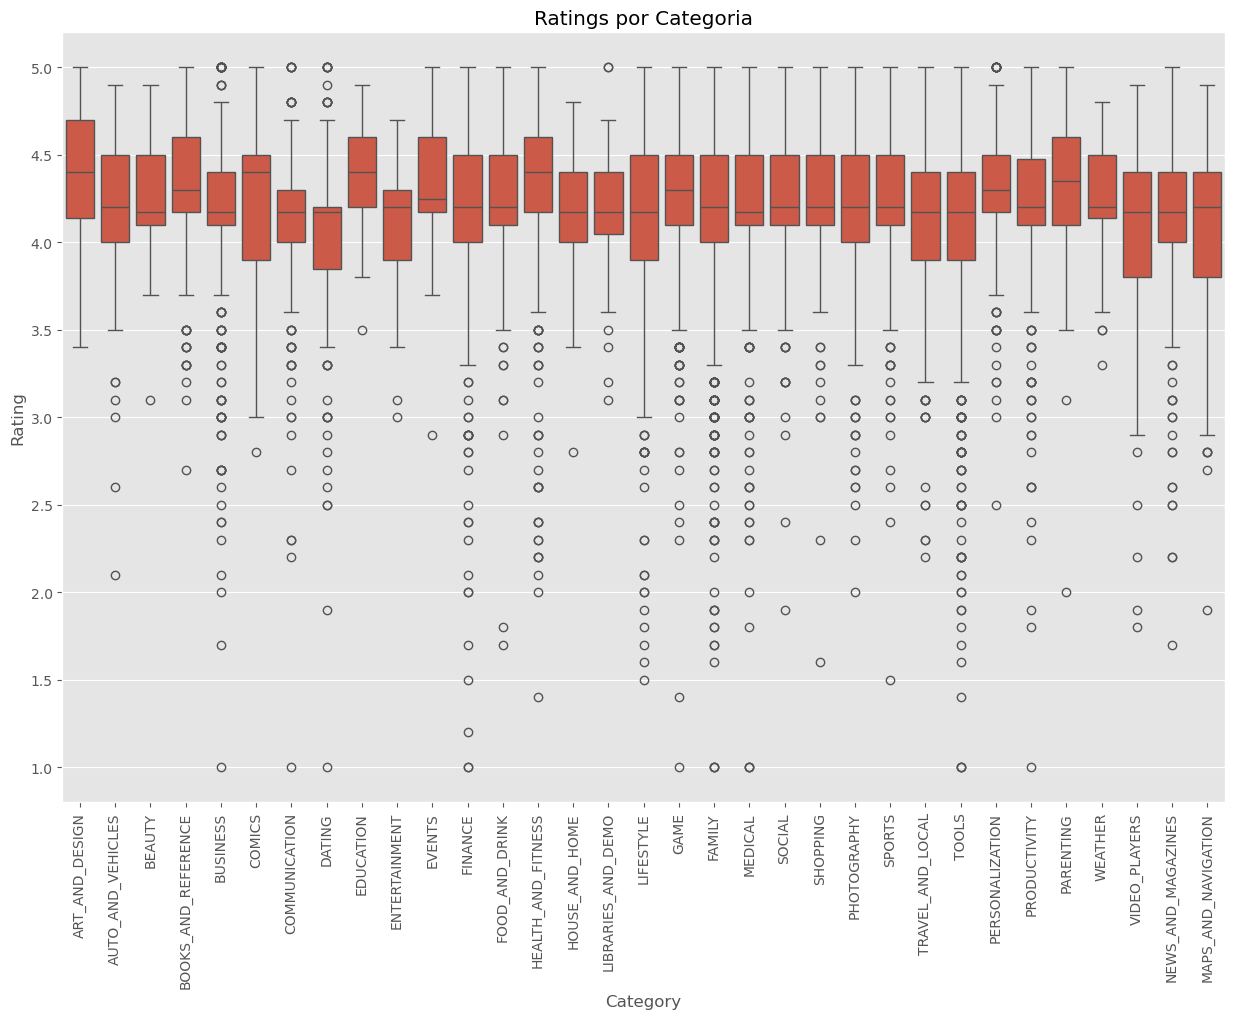

In [40]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Category', y='Rating', data=df)
plt.xticks(rotation=90)
plt.title('Ratings por Categoria')
plt.show()

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U1'), dtype('float64')) -> None

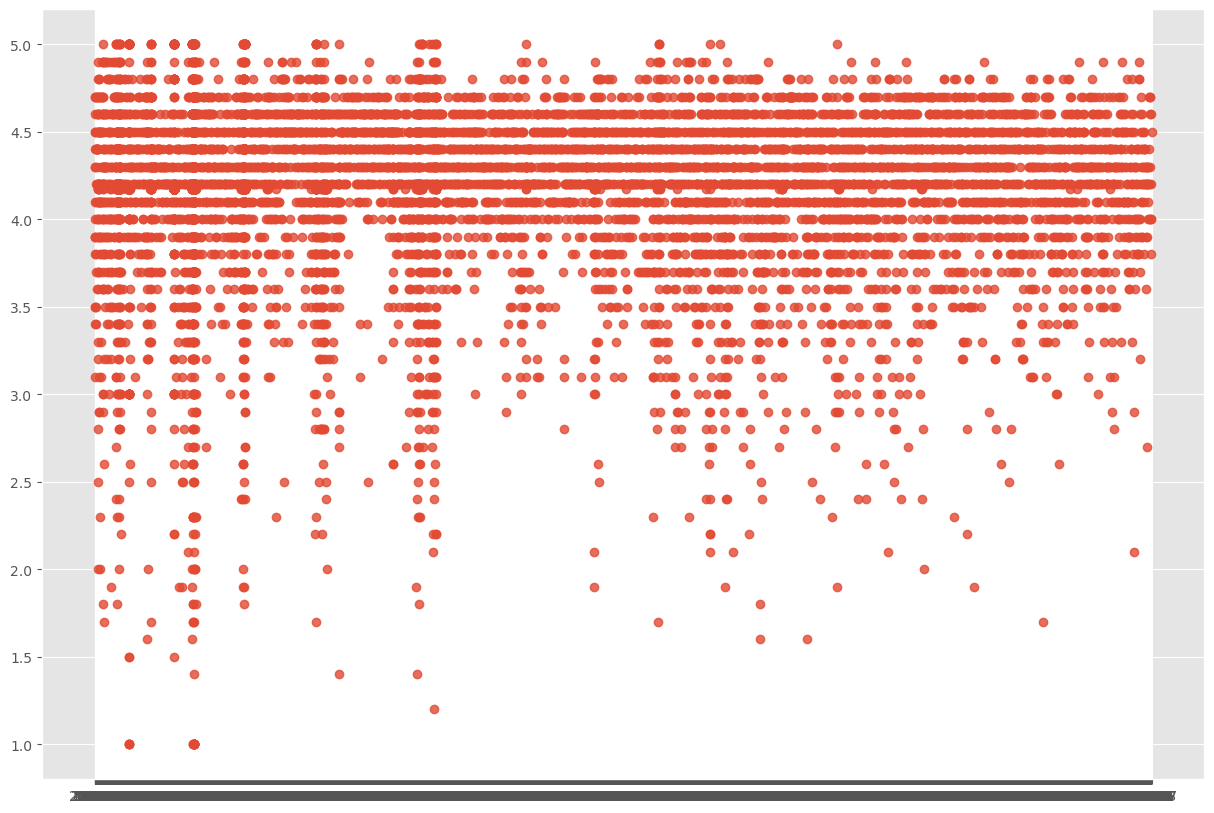

In [42]:
#Gráfico Promedio de Ratings y Reviews por Categoría
#En este caso, el gráfico muestra la relación entre el número de reseñas (Reviews) y la calificación (Rating)
#La mayoría de los puntos se agrupan cerca de las calificaciones altas (4 a 5), lo que puede indicar que muchas aplicaciones reciben buenas calificaciones independientemente del número de reseñas
#Hay algunos puntos (outliers) que se encuentran alejados de la línea de regresión, indicando casos donde las calificaciones no siguen la tendencia general.
#sugiere una relación positiva entre el número de reseñas y la calificación, aunque también muestra que hay variabilidad y factores adicionales que pueden influir en las calificaciones que no están capturados únicamente por el número de reseñas.
plt.figure(figsize=(15, 10))
sns.regplot(x='Reviews', y='Rating', data=df)
plt.title('Regresión de Reviews vs Rating')
plt.show()

In [43]:
# Gráfico Calificaciones y Reseñas Promedio por Categoría 
# Health and Fitness: Esta categoría tiene la tendencia más alta en reseñas (indicada en naranja), sugiriendo que las aplicaciones de esta categoría reciben una cantidad significativa de reseñas en comparación con otras categorías
# 
df_grouped = df.groupby('Category')[['Rating', 'Reviews']].mean()
df_grouped.plot(kind='area', stacked=True, figsize=(15, 10))
plt.title('Calificaciones y Reseñas Promedio por Categoría')
plt.show()

TypeError: agg function failed [how->mean,dtype->object]